# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.6222,  0.9168,  0.1634,  0.1369,  0.6711,  0.8718,  0.048 ,  0.7758,  0.4421,  0.8725,
        0.9504,  0.9644,  0.3082,  0.6231,  0.6969,  0.915 ,  0.0037,  0.6495,  0.7849,  0.3259,
        0.0089,  0.9453,  0.7531,  0.1687,  0.4786,  0.3888,  0.4863,  0.8595,  0.4862,  0.8462])

In [6]:
y

array([  9.8666,  10.7504,   8.4902,   8.4107,  10.0134,  10.6155,   8.1439,  10.3273,   9.3263,
        10.6176,  10.8511,  10.8931,   8.9246,   9.8692,  10.0908,  10.7451,   8.0111,   9.9485,
        10.3548,   8.9776,   8.0267,  10.8358,  10.2593,   8.5061,   9.4358,   9.1663,   9.4589,
        10.5785,   9.4586,  10.5387])

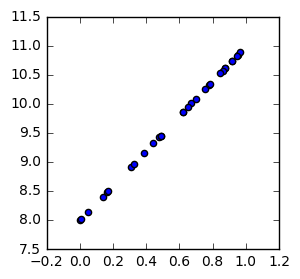

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.3687

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani